# Analyzing and Visualizing Probability Distributions

In this tutorial, we will explore the concept of degree distributions in complex networks. We will cover the following topics:

1. **Probability Density Function (PDF)**
2. **Cumulative Distribution Function (CDF)**
3. **Complementary Cumulative Distribution Function (CCDF)**

We will use a NetworkX dataset to illustrate these concepts with detailed explanations, code examples, and interpretations.

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Dataset: Barabási-Albert Model

We will use the Barabási-Albert (BA) model to generate a scale-free network. This model is known for producing networks with a power-law degree distribution, which is common in many real-world networks.

Nodes: 500, Edges: 1491


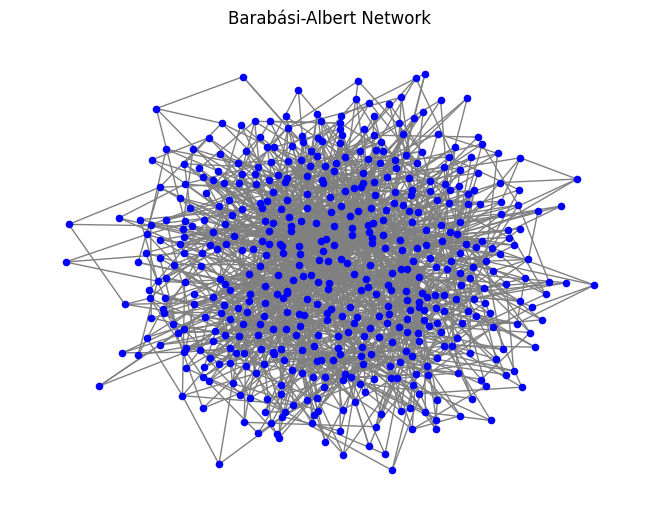

In [2]:
# Generate a Barabási-Albert network
BA_G = nx.barabasi_albert_graph(500, 3)
print(f"Nodes: {BA_G.number_of_nodes()}, Edges: {BA_G.number_of_edges()}")

# Basic visualization
pos = nx.spring_layout(BA_G, seed=42)
nx.draw(BA_G, pos, node_size=20, node_color='blue', edge_color='gray')
plt.title('Barabási-Albert Network')
plt.show()

## 1. Probability Density Function (PDF)

The Probability Density Function (PDF) of a degree distribution shows the probability of a node having a specific degree. Mathematically, it is defined as:

$$P(k) = \frac{n_k}{n}$$

where:
- $n_k$ is the number of nodes with degree $k$
- $n$ is the total number of nodes in the network.

In many networks, especially scale-free networks, the PDF follows a power-law distribution:

$$P(k) \propto k^{-\gamma}$$

### Example and Interpretation:
- A high peak in the PDF indicates that many nodes share similar degrees.
- In a scale-free network, the presence of a long tail indicates the existence of hubs. For instance, if most nodes have low degrees while a few nodes have very high degrees, the PDF will have a long tail characteristic of a power-law behavior.

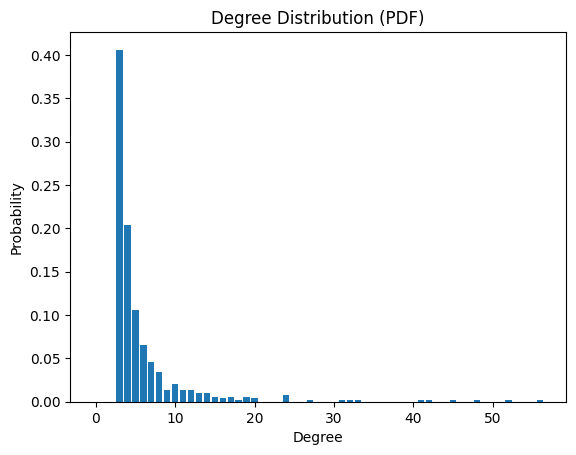

In [3]:
# Compute degree distribution
degree_sequence = [d for n, d in BA_G.degree()]
degree_count = np.bincount(degree_sequence)
degrees = np.arange(len(degree_count))
pdf = degree_count / sum(degree_count)

# Plot PDF
plt.figure()
plt.bar(degrees, pdf)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution (PDF)')
plt.show()

## 2. Cumulative Distribution Function (CDF)

The Cumulative Distribution Function (CDF) of a degree distribution gives the probability that a node has a degree less than or equal to a specific value. It is mathematically defined as:

$$F(k) = \sum_{i=0}^{k} P(i)$$

### Example and Interpretation:
- The CDF is useful for understanding the proportion of nodes with degrees below a given threshold.
- In a scale-free network, a steep increase in the CDF for low degrees indicates many nodes are non-hubs, while its gradual approach to 1 reveals that only a few nodes (hubs) have higher degrees.

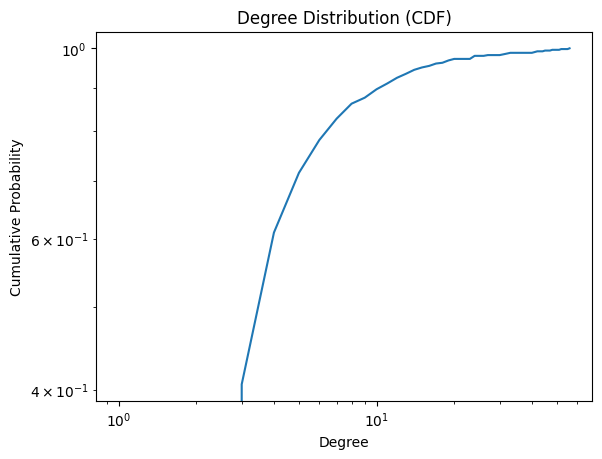

In [4]:
# Compute CDF
cdf = np.cumsum(pdf)

# Plot CDF
plt.figure()
plt.plot(degrees, cdf)
plt.xlabel('Degree')
plt.ylabel('Cumulative Probability')
plt.title('Degree Distribution (CDF)')
plt.yscale('log')
plt.xscale('log')
plt.show()

## 3. Complementary Cumulative Distribution Function (CCDF)

The Complementary Cumulative Distribution Function (CCDF) of a degree distribution shows the probability that a node has a degree greater than or equal to a specific value. It is defined as:

$$\bar{F}(k) = 1 - F(k-1) = \sum_{i=k}^{\infty} P(i)$$

### Example and Interpretation:
- The CCDF is particularly useful for examining the tail behavior of the distribution.
- In a scale-free network, a slowly decaying CCDF on a log-log plot indicates the presence of many high-degree nodes (hubs).
- If the CCDF aligns along a straight line on a log-log scale, then:

$$\bar{F}(k) \propto k^{-(\gamma-1)}$$

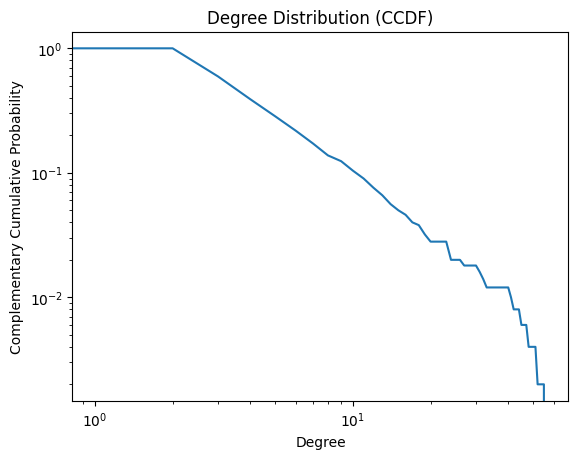

In [5]:
# Compute CCDF
ccdf = 1 - cdf

# Plot CCDF
plt.figure()
plt.plot(degrees, ccdf)
plt.xlabel('Degree')
plt.ylabel('Complementary Cumulative Probability')
plt.title('Degree Distribution (CCDF)')
plt.yscale('log')
plt.xscale('log')
plt.show()

## Interpretation

Understanding degree distributions is key for analyzing complex networks. Detailed insights include:

- **PDF:** Reveals the concentration of nodes at specific degrees, indicating whether a network is dominated by hubs or has a uniform structure.
- **CDF:** Provides a cumulative assessment of node connectivity, helping to identify the network periphery versus core nodes.
- **CCDF:** Highlights the fraction of high-degree nodes, which is essential to assess network robustness and vulnerability.

For example, in scale-free networks, the removal of high-degree hubs (as highlighted by the CCDF) may lead to severe fragmentation, while randomly removing nodes with lower degrees (as indicated by the CDF) may have a limited impact on connectivity.

## Plotting Distributions for Continuous Quantities

When analyzing network metrics like centralities (e.g., betweenness, closeness, eigenvector centrality), we encounter continuous rather than discrete values. Unlike degree which takes integer values, centrality measures can take any value within their range, often with an uneven distribution. This presents unique challenges for visualization and analysis.

### Key Challenges with Continuous Distributions:

1. **Appropriate Binning:** How to divide the continuous range into meaningful intervals
2. **Handling Skewness:** Many centrality measures follow heavy-tailed distributions
3. **Scale Considerations:** Values may span several orders of magnitude
4. **Visual Interpretation:** Finding the right visualization to reveal underlying patterns

### Binning Strategies in Detail:

1. **Equal-width (Fixed-width) Binning:**
  - Divides the range into bins of equal width
  - Most suitable for data with relatively uniform distributions
  - **Advantages**: Simple to understand and implement
  - **Disadvantages**: Can obscure patterns in skewed distributions

2. **Adaptive Binning (Freedman-Diaconis Rule):**
  - Automatically determines optimal bin width based on data properties
  - Particularly useful for exploratory analysis
  - **Advantages**: Adapts to the data's spread and sample size
  - **Disadvantages**: May still struggle with highly skewed distributions

3. **Quantile-based (Equal-frequency) Binning:**
  - Creates bins containing approximately equal numbers of observations
  - Ideal for highlighting the shape in highly skewed data
  - **Advantages**: Shows distribution shape well; works well with skewed data
  - **Disadvantages**: Bin widths vary, making density interpretation more difficult

4. **Logarithmic Binning:**
  - Creates bins with exponentially increasing widths
  - Perfect for centrality measures that span many orders of magnitude
  - **Advantages**: Reveals patterns across multiple scales; essential for heavy-tailed distributions
  - **Disadvantages**: May distort visualization of non-power-law distributions

### Choosing the Right Binning Strategy:

- **Equal-width**: Use when data is roughly uniformly distributed
- **Freedman-Diaconis**: Good default choice when you're unsure about the distribution
- **Quantile-based**: Best for highly skewed data where you want to emphasize shape
- **Logarithmic**: Essential for heavy-tailed distributions spanning multiple orders of magnitude

The code examples below demonstrate each of these binning strategies using degree centrality (a normalized measure) and betweenness centrality (often heavy-tailed).

In [6]:
# Compute degree centrality (values are normalized between 0 and 1)
# Compute betweenness centrality (this measure is often heavy-tailed)
betweenness = nx.betweenness_centrality(BA_G)
centrality_values = np.array(list(betweenness.values()))

# Quick look at the centrality distribution
print("Degree centrality stats:")
print(f"Min: {centrality_values.min()}, Max: {centrality_values.max()}")

# Define common parameters for all binning methods
common_num_bins = 20  # Use the same number of bins across all examples

# Define functions for computing and plotting CCDF
def compute_ccdf(data):
    """
    Compute the Complementary Cumulative Distribution Function (CCDF).
    
    Parameters:
    -----------
    data : array-like
        The data for which to compute the CCDF.
    
    Returns:
    --------
    tuple
        (sorted_data, ccdf) - The sorted data and corresponding CCDF values.
    """
    # Sort the data
    sorted_data = np.sort(data)
    
    # Calculate CCDF: P(X > x)
    ccdf = 1 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    return sorted_data, ccdf

def plot_ccdf(sorted_data, ccdf, title="CCDF", figsize=(8, 5)):
    """
    Plot the Complementary Cumulative Distribution Function (CCDF).
    
    Parameters:
    -----------
    sorted_data : array-like
        The sorted data values.
    ccdf : array-like
        The CCDF values corresponding to the sorted data.
    title : str, optional
        The title for the plot.
    figsize : tuple, optional
        The figure size (width, height).
    """
    plt.figure(figsize=figsize)
    plt.plot(sorted_data, ccdf, marker='o', linestyle='none', markersize=3)
    plt.xlabel("Centrality")
    plt.ylabel("CCDF (P(X > x))")
    plt.title(title)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()

Degree centrality stats:
Min: 0.0, Max: 0.12631534598245997


### Equal-width Binning

This is the simplest binning strategy where we divide the range of values into bins of equal width. In this example, we use 30 bins for the degree centrality values.

**When to use:** Good for evenly distributed data and when you want a straightforward visualization that's easy to interpret. However, it may not represent skewed data well, as it can hide patterns where data is sparse.

Equal-width binning using 20 bins
Equal-width bin edges: [0.0, 0.006316, 0.01263, 0.01895, 0.02526]...[0.1011, 0.1074, 0.1137, 0.12, 0.1263]


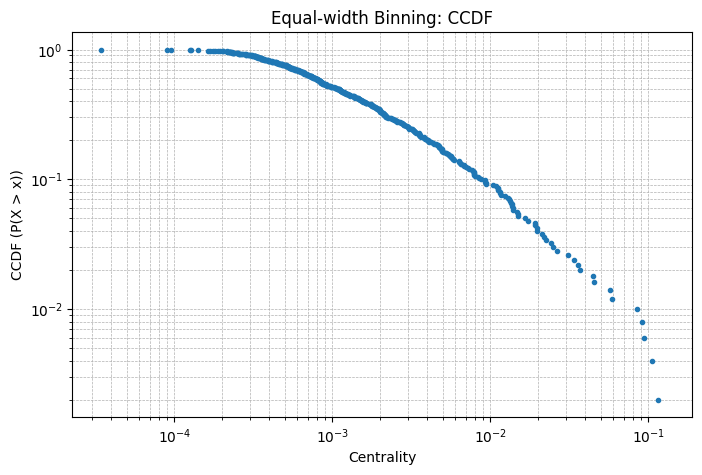

In [7]:
# Equal-width Binning
counts, bins = np.histogram(centrality_values, bins=common_num_bins)
print(f"Equal-width binning using {common_num_bins} bins")
print(f"Equal-width bin edges: {[float(f'{val:.4g}') for val in bins[:5]]}...{[float(f'{val:.4g}') for val in bins[-5:]]}")

# Compute CCDF
sorted_data, ccdf_values = compute_ccdf(centrality_values)

# Plot CCDF
plot_ccdf(sorted_data, ccdf_values, "Equal-width Binning: CCDF")

### Freedman-Diaconis Binning

This adaptive binning method automatically determines the optimal bin width based on the data's interquartile range (IQR) and sample size. The formula is: `bin width = 2 × IQR × n^(-1/3)`, where n is the sample size.

**When to use:** An excellent default choice when you're uncertain about the distribution characteristics. It adapts to both the spread and sample size of your data, offering a good balance between too few and too many bins.

Optimal number of bins: 198
Freedman-Diaconis bin edges: [0.0, 0.000638, 0.001276, 0.001914, 0.002552]...[0.1238, 0.1244, 0.125, 0.1257, 0.1263]


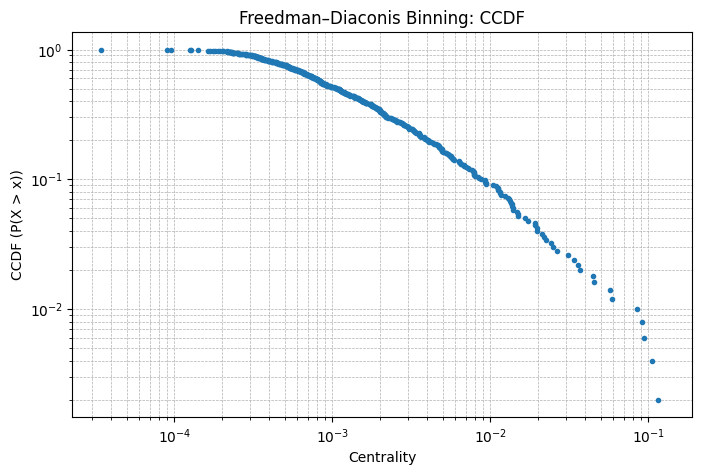

In [8]:
import numpy as np

def freedman_diaconis_bins(data):
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    bin_width = 2 * iqr / np.cbrt(len(data))
    bins = int((data.max() - data.min()) / bin_width) or 1  # Ensure at least 1 bin
    return bins

# Calculate optimal bin count
fd_bins = freedman_diaconis_bins(centrality_values)
print(f"Optimal number of bins: {fd_bins}")

# Calculate the actual bin edges
counts, bins = np.histogram(centrality_values, bins=fd_bins)

print(f"Freedman-Diaconis bin edges: {[float(f'{val:.4g}') for val in bins[:5]]}...{[float(f'{val:.4g}') for val in bins[-5:]]}")

# Compute CCDF
sorted_data, ccdf_values = compute_ccdf(centrality_values)

# Plot CCDF
plot_ccdf(sorted_data, ccdf_values, "Freedman–Diaconis Binning: CCDF")

### Quantile-based Binning

This approach creates bins that contain approximately equal numbers of observations, rather than bins of equal width. It divides the data into quantiles (like quartiles, deciles, etc.) based on the data's rank.

**When to use:** Particularly effective for highly skewed data distributions. By ensuring each bin contains roughly the same number of observations, it highlights the shape of the distribution while avoiding empty or sparse bins.

Quantile-based binning using 20 bins
Quantile bin edges (first 5): [-0.001, 0.000233, 0.00031, 0.000358, 0.000438]...[0.00304, 0.00401, 0.00562, 0.00881, 0.0165]


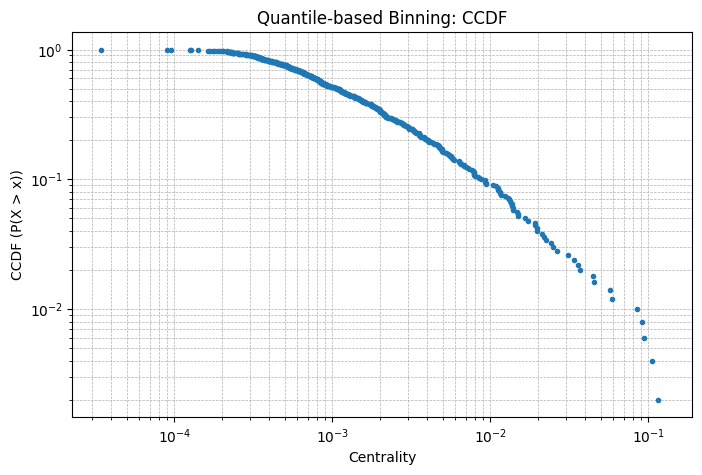

In [9]:
import pandas as pd

# Create quantile bins using the common number of bins
quantile_bins = pd.qcut(centrality_values, q=common_num_bins, duplicates='drop')
bin_edges = [float(f'{val:.4g}') for val in quantile_bins.categories.left]
print(f"Quantile-based binning using {common_num_bins} bins")
print(f"Quantile bin edges (first 5): {bin_edges[:5]}...{bin_edges[-5:]}")

# Compute CCDF
sorted_data, ccdf_values = compute_ccdf(centrality_values)

# Plot CCDF
plot_ccdf(sorted_data, ccdf_values, "Quantile-based Binning: CCDF")

### Logarithmic Binning

This strategy uses bins of exponentially increasing width, creating equally spaced bins on a logarithmic scale. It's especially useful for values spanning multiple orders of magnitude.

**When to use:** Essential for heavy-tailed distributions like betweenness centrality in scale-free networks. It reveals patterns across different scales that would be obscured in linear binning, making power-law relationships more visible.

Logarithmic binning using 20 bins
Logarithmic bin edges (first 5): [3.416e-05, 5.151e-05, 7.768e-05, 0.0001171, 0.0001767]...[0.02443, 0.03684, 0.05555, 0.08376, 0.1263]


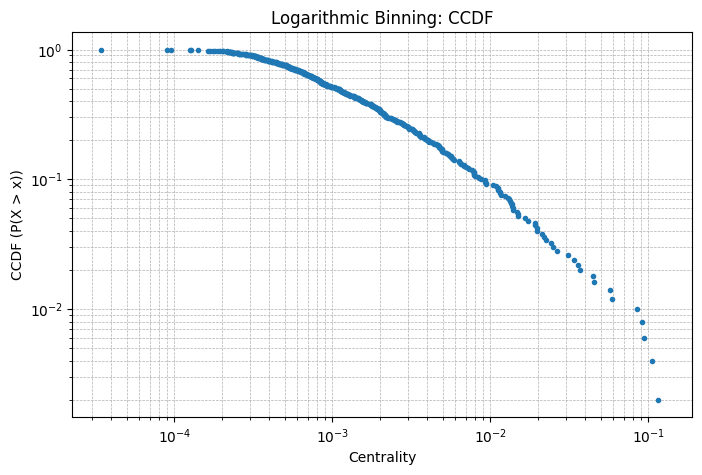

In [10]:
# Create logarithmic bins using common number of bins
if centrality_values.min() <= 0:
    min_val = centrality_values[centrality_values > 0].min()  # Handle zero or negative values
else:
    min_val = centrality_values.min()

log_bins = np.logspace(np.log10(min_val), np.log10(centrality_values.max()), common_num_bins + 1)
print(f"Logarithmic binning using {common_num_bins} bins")
print(f"Logarithmic bin edges (first 5): {[float(f'{val:.4g}') for val in log_bins[:5]]}...{[float(f'{val:.4g}') for val in log_bins[-5:]]}")

# Compute CCDF
sorted_data, ccdf_values = compute_ccdf(centrality_values)

# Plot CCDF
plot_ccdf(sorted_data, ccdf_values, "Logarithmic Binning: CCDF")